<a href="https://colab.research.google.com/github/VKHirehalli/Data-projects/blob/main/Bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


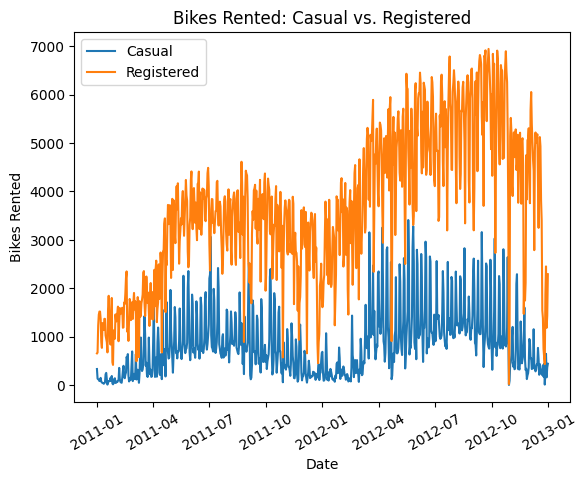

In [4]:
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])
plt.plot(bike_sharing['dteday'], bike_sharing['casual'])
plt.plot(bike_sharing['dteday'], bike_sharing['registered'])

plt.xticks(rotation = 30)
plt.ylabel('Bikes Rented')
plt.xlabel('Date')
plt.title('Bikes Rented: Casual vs. Registered')
plt.legend(labels=['Casual','Registered'])
plt.show()

Looking at the entire two-year period, we see the number of rented bikes is at its lowest during the winter months and at its highest during the summer (Capital Bikeshare operates only in the northern hemisphere, so the summer months are June-August, and the winter months are December-February).

This is clearly a seasonal trends. In time series data, we sometimes see specific patterns occurring regularly at specific intervals of time — we call this seasonality.

Weather, holidays, school vacations and other factors can often cause seasonality. One popular example is ice-cream sales seasonality, which we can attribute to variations in air temperature: sales are high during summer and low during winter.

Identifying seasonality can be useful for businesses:

    They can plan marketing campaigns at the right time.
    They don't need to panic needlessly when the sales are decreasing as a result of seasonality.
    They can hire extra employees right before the period of high activity begins.

In our case, what could be causing the seasonality in the number of rented bikes?

Biking is an outdoor activity, and people often don't ride when it's too cold outside — the wind feels very cold when you're moving.

*Let's see if we can find any similarity between how air temperature and the number of bikes rented changed over the course of 2011 and 2012*

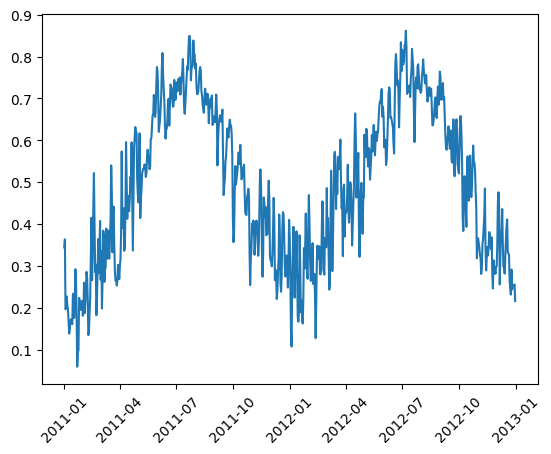

In [5]:
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])
plt.plot(bike_sharing['dteday'],bike_sharing['temp'])
plt.xticks(rotation=45)
plt.show()

So we hypothesized that this seasonality might be related to temperature variations.

The similarity in how the air temperature and the number of rented bikes changed over 2011 and 2012 supports this hypothesis.
We see that when the temperature grows, the number of bike rentals tends to grow too. When the temperature decreases, the number of rentals tends to decrease too. Although the relationship isn't perfect, the values in the two columns follow similar patterns in how they change.

 To visualize the relationship between cnt and temp, it's better if we plot one against the other, and leave out the dteday column. We can do this with a scatter plot



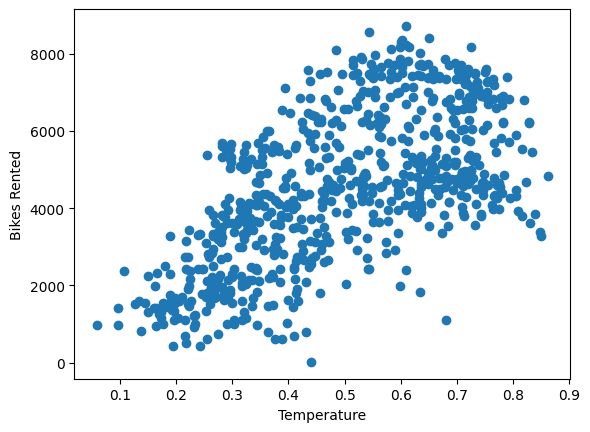

In [6]:
plt.scatter(bike_sharing['temp'], bike_sharing['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Bikes Rented')
plt.show()

The overall direction of the points is upward which means as temperature increases, the number of bike rentals tends to grow too.

**It is a positive correlation**


Let's now plot windspeed against cnt on a scatter plot

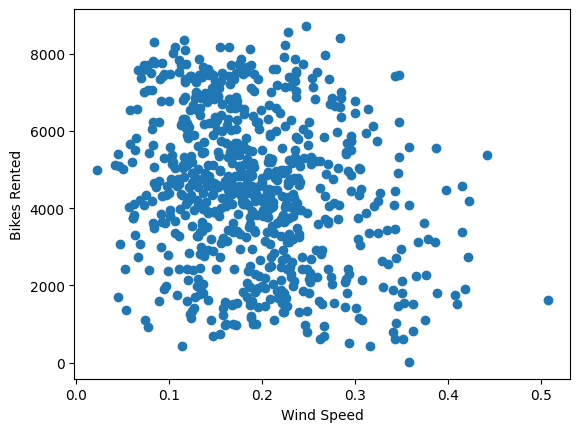

In [7]:
plt.scatter(bike_sharing['windspeed'],bike_sharing['cnt'])
plt.xlabel('Wind Speed')
plt.ylabel('Bikes Rented')
plt.show()

windspeed versus cnt shows a downward trend (approximately)

**It is a negative correlation**

In [9]:
bike_sharing['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [10]:
bike_sharing.corr()['workingday'][['casual', 'registered']]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

In [11]:
bike_sharing['workingday'].replace({1:0, 0:1}, inplace=True)
bike_sharing.corr()['workingday'][['casual', 'registered']]

casual        0.518044
registered   -0.303907
Name: workingday, dtype: float64

We're going to use the weathersit column, which is categorical and has four unique values describing the weather:

    1: clear or few clouds
    2: mist or cloudy
    3: light rain, light snow, thunderstorm
    4: heavy rain, snow, ice pellets, fog


In [13]:
bike_sharing['weathersit'].value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

We only see three unique values above, but, according to the documentation, the weathersit column has four unique values (4 has a frequency of zero as a consequence)

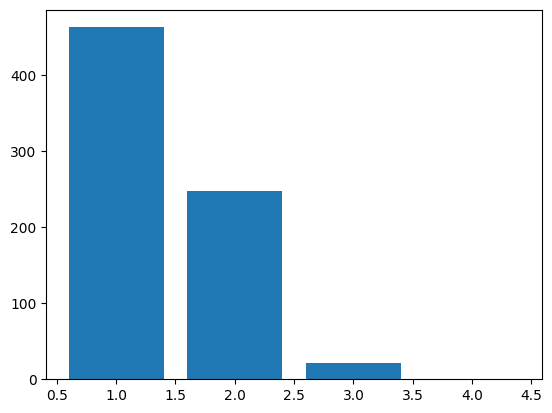

In [14]:
weather_types = [1, 2, 3, 4]
frequencies = [463, 247, 21, 0]
plt.bar(weather_types, frequencies)
plt.show()